In [1]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import SGD
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import Input
                                                                                                            


Using TensorFlow backend.
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/py

In [2]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'cellimage/train/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'cellimage/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)




test_generator = test_datagen.flow_from_directory(
        'cellimage/test/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical',
        shuffle=True)


Found 3832 images belonging to 2 classes.
Found 912 images belonging to 2 classes.
Found 1078 images belonging to 2 classes.


In [3]:
# model
model = models.Sequential()
# new layers
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(16, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

W1021 14:27:25.654325 140053094811456 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1021 14:27:25.850592 140053094811456 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:507: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1021 14:27:25.874703 140053094811456 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3831: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1021 14:27:25.946291 140053094811456 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3655: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1021 14:27:25.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        18464     
__________

In [4]:
sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(sgd, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit_generator(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

W1021 14:27:28.322571 140053094811456 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1021 14:27:28.348884 140053094811456 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3008: The name tf.log is deprecated. Please use tf.math.log instead.

W1021 14:27:28.811544 140053094811456 deprecation.py:323] From /home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1021 14:27:29.370544 140053094811456 variables.py:2445] Variable *= will be deprecated. Use `var.assign(var * other)` if you want assignment to the variable

Epoch 1/100
120/119 [==============================] - 41s 343ms/step - loss: 0.6905 - acc: 0.5273 - val_loss: 0.6958 - val_acc: 0.4496
Epoch 2/100
120/119 [==============================] - 34s 283ms/step - loss: 0.6806 - acc: 0.5908 - val_loss: 0.6918 - val_acc: 0.4572
Epoch 3/100
120/119 [==============================] - 33s 276ms/step - loss: 0.6535 - acc: 0.6977 - val_loss: 0.6768 - val_acc: 0.5713
Epoch 4/100
120/119 [==============================] - 33s 273ms/step - loss: 0.5932 - acc: 0.7480 - val_loss: 0.6124 - val_acc: 0.7127
Epoch 5/100
120/119 [==============================] - 32s 268ms/step - loss: 0.5236 - acc: 0.7487 - val_loss: 0.5989 - val_acc: 0.6809
Epoch 6/100
120/119 [==============================] - 34s 280ms/step - loss: 0.4948 - acc: 0.7515 - val_loss: 0.5114 - val_acc: 0.7785
Epoch 7/100
120/119 [==============================] - 33s 275ms/step - loss: 0.4840 - acc: 0.7536 - val_loss: 0.6156 - val_acc: 0.6053
Epoch 8/100
120/119 [===========================

Epoch 61/100
120/119 [==============================] - 33s 272ms/step - loss: 0.1280 - acc: 0.9515 - val_loss: 0.2635 - val_acc: 0.9024
Epoch 62/100
120/119 [==============================] - 34s 281ms/step - loss: 0.1212 - acc: 0.9556 - val_loss: 0.2987 - val_acc: 0.8925
Epoch 63/100
120/119 [==============================] - 33s 274ms/step - loss: 0.1198 - acc: 0.9530 - val_loss: 0.3067 - val_acc: 0.8882
Epoch 64/100
120/119 [==============================] - 33s 273ms/step - loss: 0.1197 - acc: 0.9586 - val_loss: 0.2386 - val_acc: 0.9145
Epoch 65/100
120/119 [==============================] - 35s 289ms/step - loss: 0.1225 - acc: 0.9551 - val_loss: 0.3301 - val_acc: 0.8805
Epoch 66/100
120/119 [==============================] - 36s 298ms/step - loss: 0.1178 - acc: 0.9559 - val_loss: 0.2647 - val_acc: 0.8904
Epoch 67/100
120/119 [==============================] - 34s 284ms/step - loss: 0.1171 - acc: 0.9571 - val_loss: 0.3302 - val_acc: 0.8947
Epoch 68/100
120/119 [===================

In [5]:
model.save('malaria.h5')

In [6]:
model = models.load_model('malaria.h5')
print(model)

In [7]:
model.save_weights('malaria.h5')

In [8]:
model.load_weights('malaria.h5')

In [9]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(train_acc)
print(val_acc)
print(train_loss)
print(val_loss)

[0.5271398746146041, 0.5910751566384183, 0.6972860126505316, 0.7476513571181725, 0.7486951983298539, 0.7515657618797398, 0.7536534446764092, 0.7541753653444676, 0.7567849686847599, 0.7552192068050201, 0.7583507308133709, 0.7526096033402923, 0.7549582462221197, 0.7596555323590815, 0.757567849562412, 0.7656576200417536, 0.7682672232576103, 0.7753131524008351, 0.7896659708968782, 0.8037578288100209, 0.8379436325678496, 0.8481210857194251, 0.8431628393728698, 0.8653444677653541, 0.8705636743215032, 0.8883089771599262, 0.8909185802513473, 0.912317327641744, 0.9164926932350828, 0.9230167015858135, 0.9305845511482255, 0.9313674321503131, 0.9318893529428072, 0.9436325679741224, 0.9389352819615964, 0.9438935283081517, 0.9407620040509298, 0.9438935281837161, 0.9454592901878914, 0.9446764090613682, 0.944937369519833, 0.9402400833828714, 0.9483298538622129, 0.9478079331941545, 0.9446764090613682, 0.9465031315240083, 0.946764091733602, 0.9451983297294266, 0.9459812109803855, 0.9493736950738942, 0.9

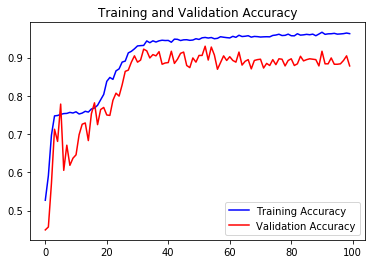

<Figure size 432x288 with 0 Axes>

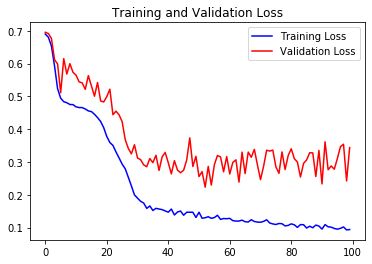

In [10]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [11]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


68/67 [==============================] - 5s 76ms/step
No of errors = 531/1078


So the performance on test set is really poor which may be due to less training set